# Personality Dataset



In [12]:
#Created by Jesús García García - Master´s Degree in Big Data Analytics UEM

In [13]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys._enablelegacywindowsfsencoding()
%matplotlib inline

#read dataset
dataset_path = r"C:\mbti_1.csv"
df = pd.read_csv(dataset_path,  error_bad_lines=False, encoding='cp1252')
#create new columns
df.columns = ['label', 'text']

#delete '' from Dataset
df['text'] = df['text'].str.replace(r"[\"\',]", '')

#print head of Dataset
df.head()

b'Skipping line 171: expected 2 fields, saw 23\nSkipping line 6103: expected 2 fields, saw 4\n'


,label,text
0,ENTP,Im finding the lack of me in these posts very ...
1,INTP,Good one _____ https://www.youtube.com/watc...
2,INTJ,Dear INTP I enjoyed our conversation the oth...
3,ENTJ,Youre fired.|||Thats another silly misconcepti...
4,INTJ,18/37 @.@|||Science is not perfect. No scient...


In [14]:
#word counts
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)
#words per comment (we are going to analyse last 100 messages)
df['words_comment'] = df['text'].apply(lambda x: len(x.split())/100)
#variance of word counts
df['variance_word_counts'] = df['text'].apply(lambda x: var_row(x))
#print head of Dataset
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8672 entries, 0 to 8671
Data columns (total 4 columns):
label                   8672 non-null object
text                    8672 non-null object
words_comment           8672 non-null float64
variance_word_counts    8672 non-null float64
dtypes: float64(2), object(2)
memory usage: 271.1+ KB


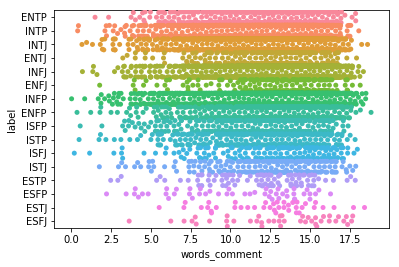

In [15]:
#print swarmplot
sns.swarmplot(x="words_comment", y="label", data=df)

In [16]:
df.groupby('label').agg({'label':'count'})

,label
label,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1469


In [17]:
#Create new df aux
dfaux=df.copy()

#Delete not useful labels because data are not relevant
dfaux.drop(dfaux[dfaux.label == 'ESFJ'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESFP'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESTJ'].index, inplace=True)
dfaux.drop(dfaux[dfaux.label == 'ESTP'].index, inplace=True)
#http per comment
dfaux['http_comment'] = dfaux['text'].apply(lambda x: x.count('http')/100)
#points per comment
dfaux['points_comment'] = dfaux['text'].apply(lambda x: x.count('...')/100)
#question per comment
dfaux['question_comment'] = dfaux['text'].apply(lambda x: x.count('?')/100)
#exclamation per comment
dfaux['exclamation_comment'] = dfaux['text'].apply(lambda x: x.count('!')/100)
#caret per comment
dfaux['caret_comment'] = dfaux['text'].apply(lambda x: x.count('^')/100)
#wink emoji per comment
dfaux['emojiwink_comment'] = dfaux['text'].apply(lambda x: x.count(';)')/100)
#smile emoji per comment
dfaux['emojismile_comment'] = dfaux['text'].apply(lambda x: x.count(':)')/100)
#plus smile emoji per comment
dfaux['emojismilep_comment'] = dfaux['text'].apply(lambda x: x.count(':D')/100)
#plusp smile emoji per comment
dfaux['emojismilepp_comment'] = dfaux['text'].apply(lambda x: x.count(':-)')/100)

dfaux.head()

,label,text,words_comment,variance_word_counts,http_comment,points_comment,question_comment,exclamation_comment,caret_comment,emojiwink_comment,emojismile_comment,emojismilep_comment,emojismilepp_comment
0,ENTP,Im finding the lack of me in these posts very ...,11.70,187.4756,0.10,0.19,0.05,0.00,0.0,0.00,0.05,0.09,0.0
1,INTP,Good one _____ https://www.youtube.com/watc...,8.36,180.6900,0.05,0.13,0.12,0.04,0.0,0.00,0.07,0.02,0.0
2,INTJ,Dear INTP I enjoyed our conversation the oth...,10.64,181.8324,0.02,0.26,0.11,0.03,0.0,0.00,0.00,0.00,0.0
3,ENTJ,Youre fired.|||Thats another silly misconcepti...,9.67,196.4576,0.06,0.21,0.10,0.01,0.0,0.01,0.00,0.00,0.0
4,INTJ,18/37 @.@|||Science is not perfect. No scient...,14.91,97.7200,0.01,0.39,0.10,0.00,0.0,0.00,0.00,0.00,0.0


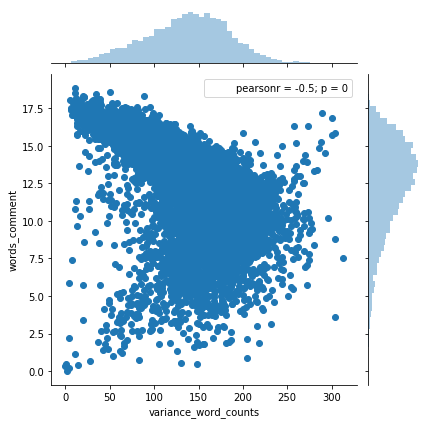

In [18]:
sns.jointplot(x='variance_word_counts',y='words_comment',data=dfaux)

In [19]:
print(dfaux.groupby('label').agg({'http_comment': 'mean'}))
print(dfaux.groupby('label').agg({'points_comment': 'mean'}))
print(dfaux.groupby('label').agg({'question_comment': 'mean'}))
print(dfaux.groupby('label').agg({'exclamation_comment': 'mean'}))
print(dfaux.groupby('label').agg({'caret_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojiwink_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismile_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilep_comment': 'mean'}))
print(dfaux.groupby('label').agg({'emojismilepp_comment': 'mean'}))

       http_comment
label              
ENFJ       0.026632
ENFP       0.025230
ENTJ       0.026580
ENTP       0.024131
INFJ       0.032798
INFP       0.037713
INTJ       0.031798
INTP       0.035395
ISFJ       0.035301
ISFP       0.044170
ISTJ       0.030585
ISTP       0.040504
       points_comment
label                
ENFJ         0.372211
ENFP         0.357941
ENTJ         0.323333
ENTP         0.315518
INFJ         0.360858
INFP         0.338297
INTJ         0.315550
INTP         0.316262
ISFJ         0.330723
ISFP         0.298081
ISTJ         0.319171
ISTP         0.293501
       question_comment
label                  
ENFJ           0.110316
ENFP           0.118089
ENTJ           0.125152
ENTP           0.112102
INFJ           0.107801
INFP           0.104945
INTJ           0.112275
INTP           0.114881
ISFJ           0.101265
ISFP           0.109336
ISTJ           0.111415
ISTP           0.111958
       exclamation_comment
label                     
ENFJ              0.13

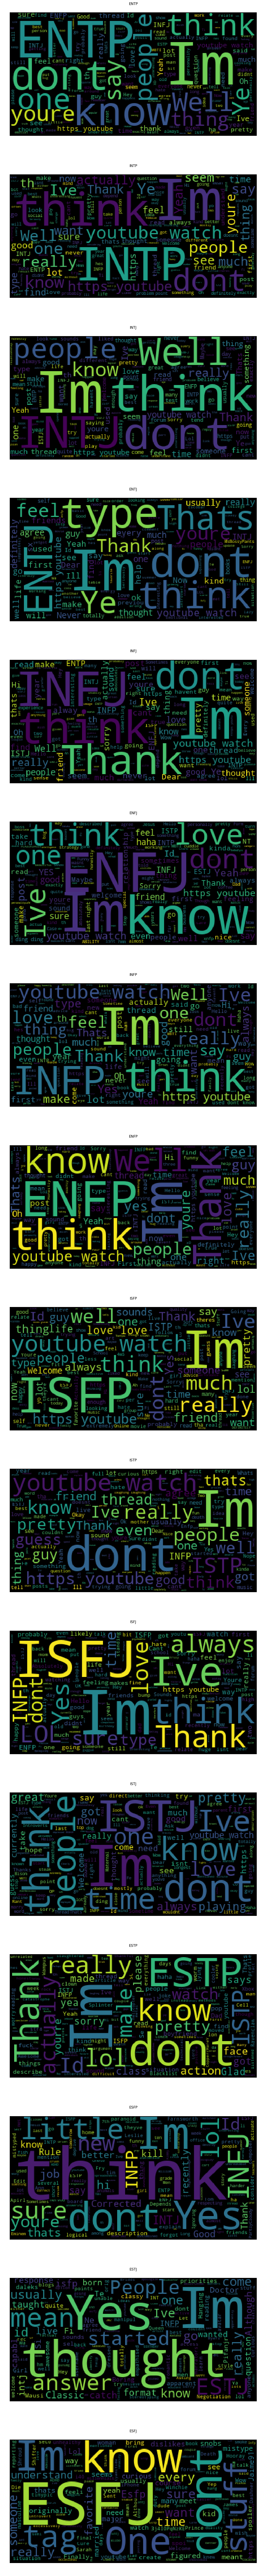

In [20]:
import os
os.path
from PIL import Image
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['label'].unique()), sharex=True, figsize=(15,10*len(df['label'].unique())))

k = 0
for i in df['label'].unique():
    df_4 = df[df['label'] == i]
    wordcloud = WordCloud().generate(df_4['text'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1